https://github.com/DataTalksClub/data-engineering-zoomcamp/blob/main/cohorts/2023/week_3_data_warehouse/homework.md

## Prepare GCS data

**prefect orion start**

Create block "__GCS Bucket__" in prefect:

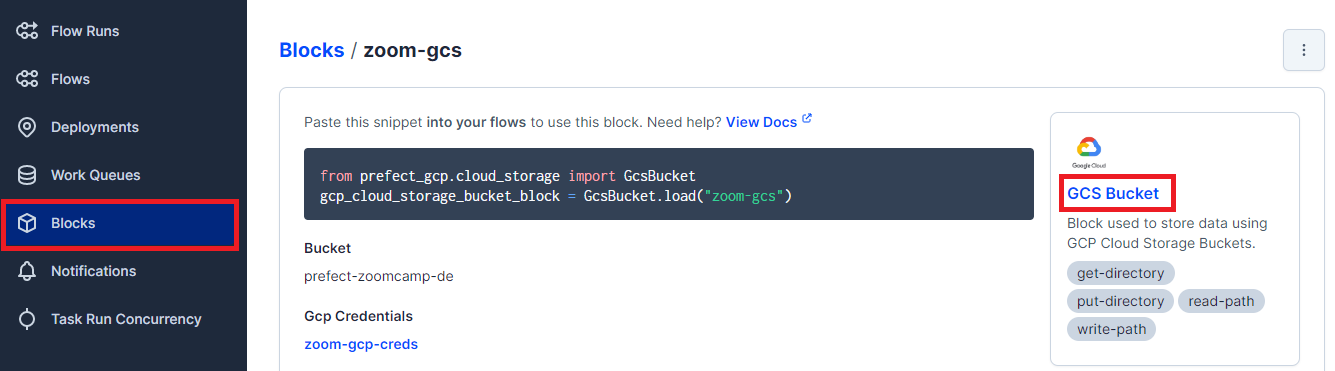

Run script to upload file to Bucket:

**python upload_data_into_gcs.py**

See result in GCS:

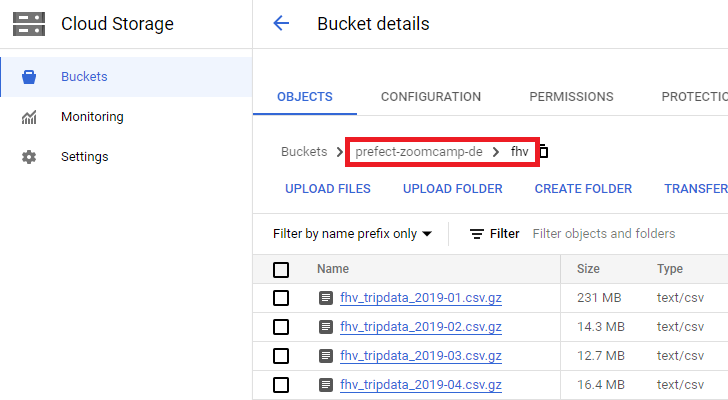

## Setup
* Create an external table using the fhv 2019 data.
* Create a table in BQ using the fhv 2019 data (do not partition or cluster this table).
* Data can be found here: https://github.com/DataTalksClub/nyc-tlc-data/releases/tag/fhv

Create an external table using the fhv 2019 data

Create a table in BQ using the fhv 2019 data (do not partition or cluster this table)

# Question 1:

What is the count for fhv vehicle records for year 2019?

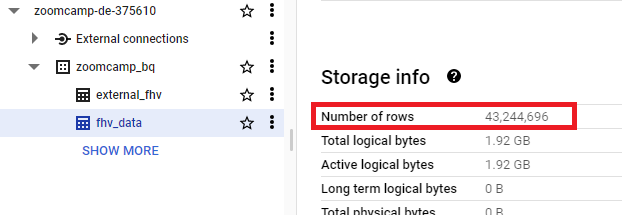

Count with the query:

SELECT COUNT(1) from `zoomcamp_bq.fhv_data`;

Answer: __43,244,696__

# Question 2:

Write a query to count the distinct number of affiliated_base_number for the entire dataset on both the tables.

What is the estimated amount of data that will be read when this query is executed on the External Table and the Table?

SELECT COUNT(DISTINCT(Affiliated_base_number)) FROM `zoomcamp-de-375610.zoomcamp_bq.external_fhv`

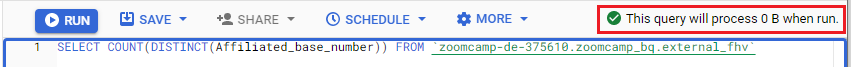

SELECT COUNT(DISTINCT(Affiliated_base_number)) FROM `zoomcamp-de-375610.zoomcamp_bq.fhv_data`

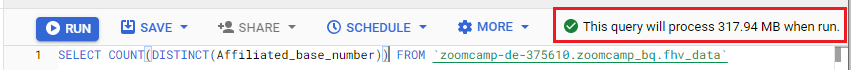

Answer: __0 MB for the External Table and 317.94MB for the BQ Table__

# Question 3:

How many records have both a blank (null) PUlocationID and DOlocationID in the entire dataset?

SELECT COUNT(1) FROM `zoomcamp_bq.fhv_data` WHERE PUlocationID IS NULL AND DOlocationID IS NULL

Answer: __717,748__

# Question 4:

What is the best strategy to optimize the table if query always filter by pickup_datetime and order by affiliated_base_number?

Answer: **Partition by pickup_datetime Cluster on affiliated_base_number**

# Question 5:

Implement the optimized solution you chose for question 4:

CREATE OR REPLACE TABLE `zoomcamp-de-375610.zoomcamp_bq.fhv_partitioned_clustered`
<br>PARTITION BY DATE(pickup_datetime)
<br>CLUSTER BY Affiliated_base_number
<br>AS (SELECT * FROM `zoomcamp-de-375610.zoomcamp_bq.fhv_data`)

Write a query to retrieve the distinct affiliated_base_number between pickup_datetime 2019/03/01 and 2019/03/31 (inclusive).

Use the BQ table you created earlier in your from clause and note the estimated bytes. Now change the table in the from clause to the partitioned table you created for question 4 and note the estimated bytes processed. What are these values? Choose the answer which most closely matches.

SELECT DISTINCT(Affiliated_base_number) FROM `zoomcamp-de-375610.zoomcamp_bq.fhv_data` 
<br>WHERE DATE(pickup_datetime) BETWEEN "2019-03-1" AND "2019-03-31" 

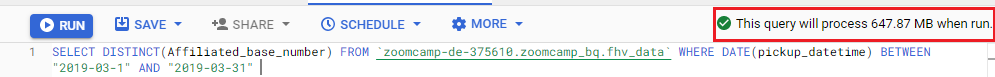

SELECT DISTINCT(Affiliated_base_number) FROM `zoomcamp-de-375610.zoomcamp_bq.fhv_partitioned_clustered`
<br>WHERE DATE(pickup_datetime) BETWEEN "2019-03-1" AND "2019-03-31" 

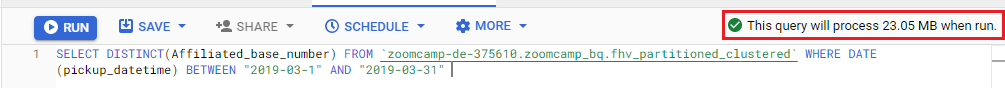

Answer: __647.87 MB for non-partitioned table and 23.06 MB for the partitioned table__

# Question 6:

Where is the data stored in the External Table you created?

Answer: __GCP Bucket__

# Question 7:

It is best practice in Big Query to always cluster your data:

Answer: __False__